In [6]:
import pandas as pd

path = 'C:/Unicamp/mestrado/simulacoes/RPS-python/RPS-POO/outputs/sensibilidade/vizinhosY_e_O/'
prob_ter_3_estrategias = pd.read_csv(path + 'prob_ter_3_estrategias.csv')
#print(prob_ter_3_estrategias)

manutencao_medio = pd.read_csv(path + 'manutencao_estrategias_media.csv')
#print(manutencao_medio)

prop_estrategias_mantidas = pd.read_csv(path + 'proporcao_estrategias_mantidas.csv')
print(prop_estrategias_mantidas)

      y   o  prop_B_mantida  prop_O_mantida  prop_Y_mantida
0     1   1            1.00            1.00            0.00
1     1   2            0.22            0.99            0.49
2     1   3            0.45            0.57            0.98
3     1   4            0.53            1.00            1.00
4     1   5            1.00            1.00            1.00
..   ..  ..             ...             ...             ...
571  24  20            1.00            1.00            1.00
572  24  21            1.00            1.00            1.00
573  24  22            1.00            1.00            1.00
574  24  23            1.00            1.00            1.00
575  24  24            1.00            1.00            1.00

[576 rows x 5 columns]


C:\Users\nicko\AppData\Local\Temp\ipykernel_3396\1651714766.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="B = 8")


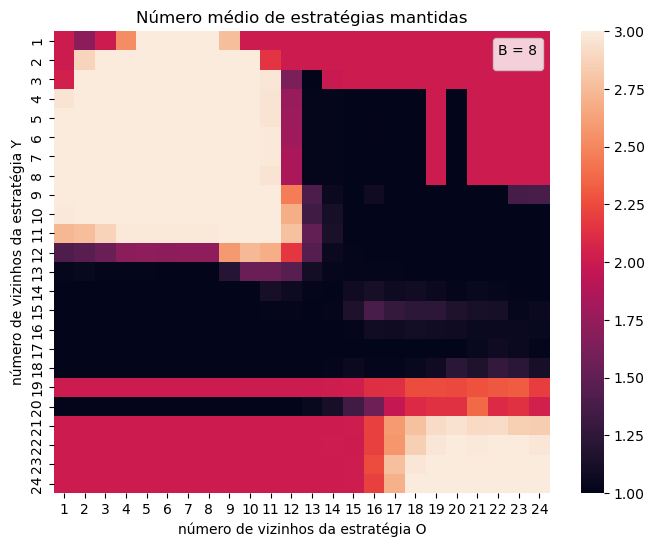

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Heatmap (média de estratégias vivas por (y,o)) ---
heatmap_data = manutencao_medio.pivot(index="y", columns="o", values="media_estrategias_mantidas")

plt.figure(figsize=(8,6))
sns.heatmap(heatmap_data, annot=False, fmt=".2f", cmap="rocket")
plt.title("Número médio de estratégias mantidas")
plt.ylabel("número de vizinhos da estratégia Y")
plt.xlabel("número de vizinhos da estratégia O")
plt.legend(title="B = 8")
plt.savefig(path + 'manutencao_estrategias_media_heatmap.png')
plt.show()

C:\Users\nicko\AppData\Local\Temp\ipykernel_3396\2050667126.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="B = 8")


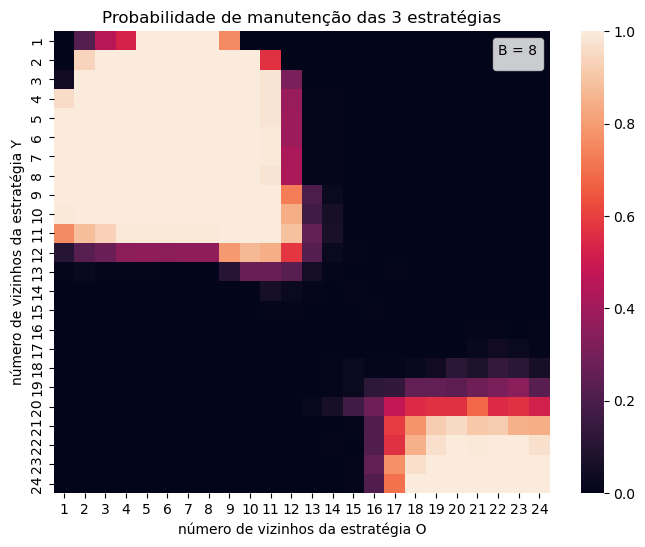

In [4]:
# --- Heatmap (probabilidade de ter 3 estratégias vivas por (y,o)) ---
heatmap_data_3_strat = prob_ter_3_estrategias.pivot(index="y", columns="o", values="prob_ter_3_estrategias")    

plt.figure(figsize=(8,6))
sns.heatmap(heatmap_data_3_strat, annot=False, fmt=".2f", cmap="rocket")
plt.title("Probabilidade de manutenção das 3 estratégias")
plt.ylabel("número de vizinhos da estratégia Y")
plt.xlabel("número de vizinhos da estratégia O")
plt.legend(title="B = 8")
plt.savefig(path + 'prob_ter_3_estrategias_heatmap.png')
plt.show()

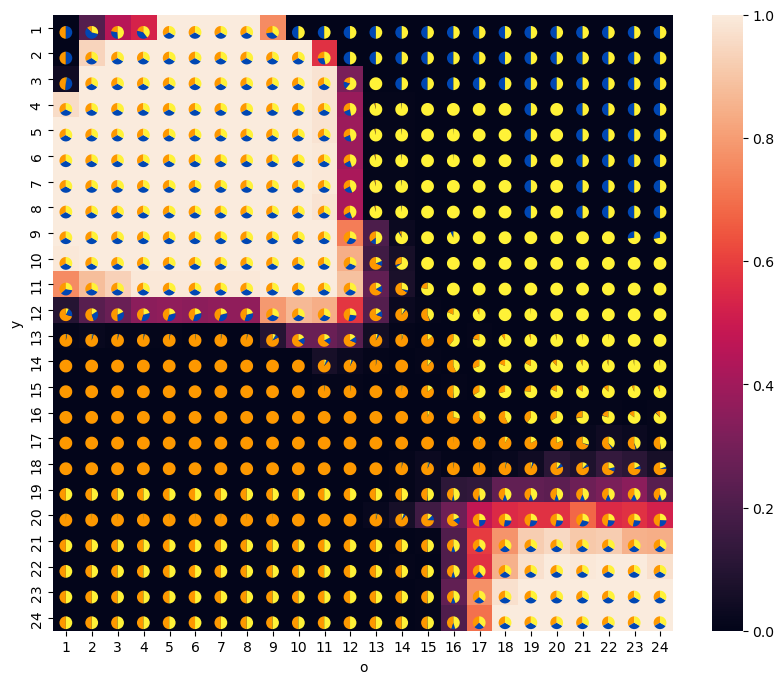

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Heatmap de fundo
heatmap_data = prob_ter_3_estrategias.pivot(index="y", columns="o", values="prob_ter_3_estrategias")
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(heatmap_data, ax=ax, cmap="rocket", cbar=True, annot=False)

# Sobrepor gráficos de pizza
for _, row in prop_estrategias_mantidas.iterrows():
    y = row['y']
    o = row['o']
    sizes = [row['prop_B_mantida'], row['prop_O_mantida'], row['prop_Y_mantida']]
    # Coordenadas do centro da célula
    x = o - 0.9
    y_coord = y + 1
    # Cria um eixo menor para a pizza
    pie_ax = fig.add_axes([ax.get_position().x0 + x/heatmap_data.shape[1]*ax.get_position().width,
                           ax.get_position().y0 + (heatmap_data.shape[0]-y)/heatmap_data.shape[0]*ax.get_position().height,
                           0.02, 0.02])
    pie_ax.pie(sizes, colors=["#FD9800", "#0047B3", "#FFF237"], startangle=90)
    pie_ax.set_aspect('equal')
    pie_ax.axis('off')

plt.ylabel("número de vizinhos da estratégia Y")
plt.xlabel("número de vizinhos da estratégia O")
plt.savefig(path + 'heatmap_com_pizza.png')
plt.show()